# AI-Based Crop Recommendation System (TGPDS20)
A software application that suggests the best crops based on soil type, climate, and weather conditions, helping farmers maximize yield and efficiency.


# Data Preprocessing

In [2]:
# Preprocessing pipeline for crop yield dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/crop_yield.csv', low_memory=False)

# Handling mixed datatypes and missing values
df.dropna(inplace=True)

# Convert boolean columns to numeric
df['Fertilizer_Used'] = df['Fertilizer_Used'].astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].astype(int)

# Encoding categorical features using Label Encoding (or use OneHotEncoder if preferred)
categorical_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Data ready for modeling!")


Preprocessing complete. Data ready for modeling!


# Random Forest

## Training RandomForest Model

In [3]:
# Building a Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Squared Error: 0.41
Root Mean Squared Error: 0.64
R-squared (R2) Score: 0.88


# Hyper Tuning

In [4]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search with Cross Validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)

# Evaluate best model
best_rf = random_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Display tuned model performance
print(f'Tuned Mean Squared Error: {mse_tuned:.2f}')
print(f'Tuned Root Mean Squared Error: {rmse_tuned:.2f}')
print(f'Tuned R-squared (R2) Score: {r2_tuned:.2f}')

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Tuned Mean Squared Error: 0.52
Tuned Root Mean Squared Error: 0.72
Tuned R-squared (R2) Score: 0.85


Explore XgBoost

In [5]:
# XGBoost Regression Implementation
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display evaluation metrics
print(f'XGBoost Mean Squared Error: {mse_xgb:.2f}')
print(f'XGBoost Root Mean Squared Error: {rmse_xgb:.2f}')
print(f'XGBoost R-squared (R2) Score: {r2_xgb:.2f}')


XGBoost Mean Squared Error: 0.44
XGBoost Root Mean Squared Error: 0.67
XGBoost R-squared (R2) Score: 0.87


# Visualisation and Reports

In [5]:
# Built-in feature importance using Random Forest
import matplotlib.pyplot as plt

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

NameError: name 'rf_model' is not defined

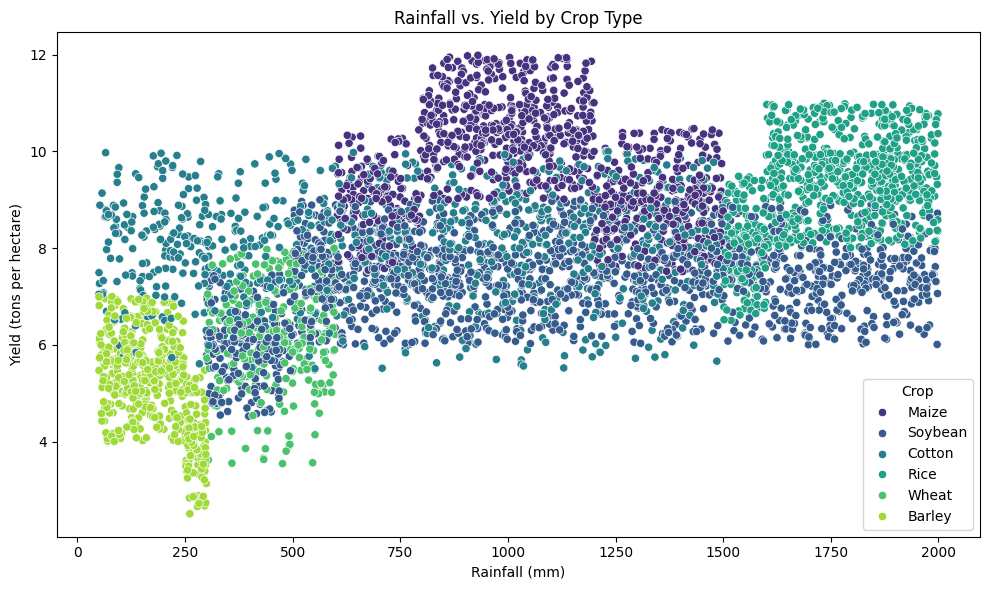

<ipython-input-6-c7148e435e75>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x='Fertilizer_Used', y='Yield_tons_per_hectare', palette='Set2')


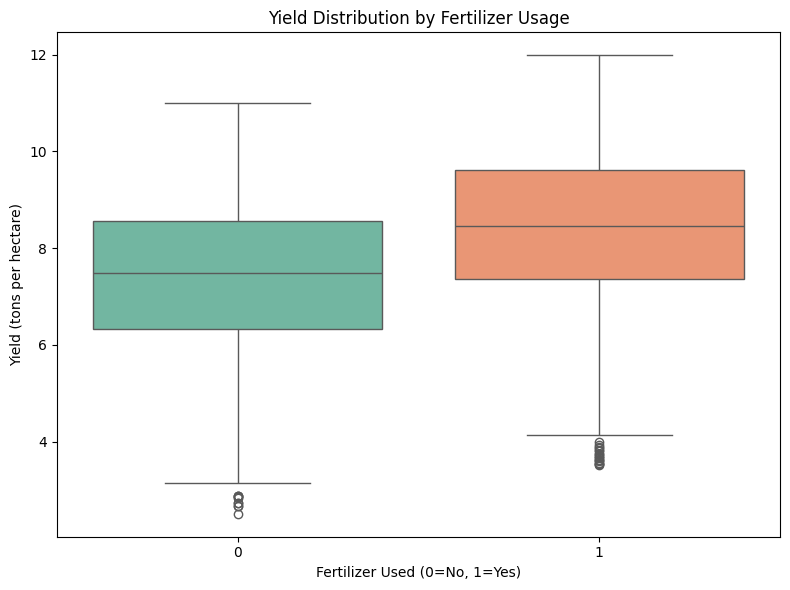

<ipython-input-6-c7148e435e75>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x='Irrigation_Used', y='Yield_tons_per_hectare', palette='Set3')


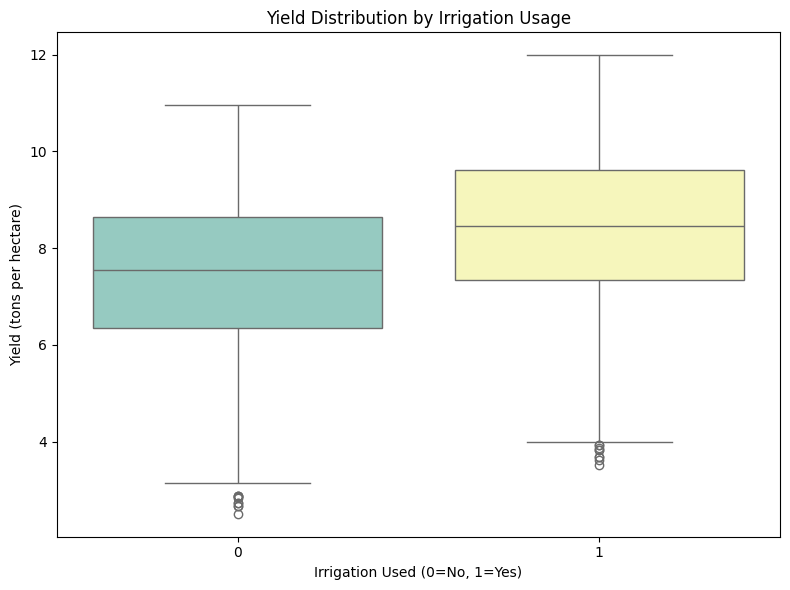

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean and preprocessed data again for accurate visualization
df_viz = df.dropna().copy()

# Convert boolean columns explicitly to integers for visualization
df_viz['Fertilizer_Used'] = df_viz['Fertilizer_Used'].astype(int)
df_viz['Irrigation_Used'] = df_viz['Irrigation_Used'].astype(int)

# Plot 1: Scatter Plot (Rainfall vs Yield)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='Rainfall_mm', y='Yield_tons_per_hectare', hue='Crop', palette='viridis')
plt.title('Rainfall vs. Yield by Crop Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.legend(title='Crop')
plt.tight_layout()
plt.show()

# Plot 2: Box Plot (Fertilizer Usage vs Yield)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_viz, x='Fertilizer_Used', y='Yield_tons_per_hectare', palette='Set2')
plt.title('Yield Distribution by Fertilizer Usage')
plt.xlabel('Fertilizer Used (0=No, 1=Yes)')
plt.ylabel('Yield (tons per hectare)')
plt.tight_layout()
plt.show()

# Plot 3: Box Plot (Irrigation Usage vs Yield)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_viz, x='Irrigation_Used', y='Yield_tons_per_hectare', palette='Set3')
plt.title('Yield Distribution by Irrigation Usage')
plt.xlabel('Irrigation Used (0=No, 1=Yes)')
plt.ylabel('Yield (tons per hectare)')
plt.tight_layout()
plt.show()

# Classification Model

data preprocessing

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

regions = ['North', 'South', 'East', 'West']

crops_info = {
    'Wheat': {
        'soil': ['Loam', 'Clay'],
        'rainfall': (300, 900),
        'temperature': (10, 25),
        'climate': ['Sunny'],
        'harvest': (120, 210),
        'rotation': ['Chickpea', 'Pea', 'Lentil', 'Soybean', 'Mustard'],
        'base_yield': 4
    },
    'Maize': {
        'soil': ['Loam', 'Silt', 'Sand'],
        'rainfall': (500, 800),
        'temperature': (18, 27),
        'climate': ['Sunny'],
        'harvest': (90, 120),
        'rotation': ['Soybean', 'Cowpea', 'Groundnut', 'Potato', 'Sweet Potato'],
        'base_yield': 8
    },
    'Barley': {
        'soil': ['Loam', 'Sandy Loam', 'Clay'],
        'rainfall': (250, 700),
        'temperature': (12, 25),
        'climate': ['Sunny'],
        'harvest': (120, 180),
        'rotation': ['Lentil', 'Pea', 'Chickpea', 'Mustard'],
        'base_yield': 3
    },
    'Soybean': {
        'soil': ['Loam', 'Clay', 'Sandy Loam'],
        'rainfall': (500, 900),
        'temperature': (20, 30),
        'climate': ['Sunny', 'Rainy'],
        'harvest': (90, 150),
        'rotation': ['Wheat', 'Maize', 'Sorghum', 'Barley'],
        'base_yield': 5
    },
    'Rice': {
        'soil': ['Clay', 'Silt', 'Loam'],
        'rainfall': (1000, 2000),
        'temperature': (20, 35),
        'climate': ['Rainy'],
        'harvest': (90, 180),
        'rotation': ['Lentil', 'Chickpea', 'Green Gram', 'Mustard'],
        'base_yield': 7
    },
    'Cotton': {
        'soil': ['Loam', 'Sandy Loam', 'Black Soil'],
        'rainfall': (600, 1200),
        'temperature': (25, 35),
        'climate': ['Sunny'],
        'harvest': (150, 180),
        'rotation': ['Soybean', 'Groundnut', 'Green Gram', 'Wheat'],
        'base_yield': 6
    }
}

rows = 10000
data = []

for _ in range(rows):
    crop = np.random.choice(list(crops_info.keys()))
    info = crops_info[crop]
    entry = {
        'Region': np.random.choice(regions),
        'Soil_Type': np.random.choice(info['soil']),
        'Rainfall_mm': np.random.uniform(*info['rainfall']),
        'Temperature_Celsius': np.random.uniform(*info['temperature']),
        'Fertilizer_Used': 1,
        'Climate': np.random.choice(info['climate']),
        'Days_to_Harvest': np.random.randint(*info['harvest']),
        'Crop': crop,
        'Rotation_Crop': np.random.choice(info['rotation'])
    }

    yield_factor = np.random.uniform(-0.5, 0.5)
    fertilizer_bonus = np.random.uniform(0.5, 1.5)

    entry['Yield_tons_per_hectare'] = info['base_yield'] + yield_factor + fertilizer_bonus

    data.append(entry)

# Create DataFrame
df = pd.DataFrame(data)

df.to_csv('complex_crop_dataset.csv', index=False)

print(df.head())


  Region   Soil_Type  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
0  North  Sandy Loam   792.797577            25.986585                1   
1   West        Loam  1020.584494            34.548648                1   
2   West        Clay   614.853859            16.479175                1   
3   West  Sandy Loam   682.427994            27.851760                1   
4   East        Loam  1170.524124            20.975774                1   

  Climate  Days_to_Harvest     Crop Rotation_Crop  Yield_tons_per_hectare  
0   Sunny              147  Soybean       Sorghum                5.559224  
1   Rainy              119     Rice      Chickpea                7.992990  
2   Sunny              168    Wheat        Lentil                4.751347  
3   Sunny              133  Soybean       Sorghum                6.449994  
4   Rainy               93     Rice        Lentil                8.774029  


Preprocessing 2nd

In [6]:
complex_dataset = pd.read_csv('/content/complex_crop_dataset.csv')

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Preprocessing the dataset
label_encoders = {}
categorical_features = ['Region', 'Soil_Type', 'Climate']

# Encode categorical features
for col in categorical_features:
    le = LabelEncoder()
    complex_dataset[col] = le.fit_transform(complex_dataset[col])
    label_encoders[col] = le
    joblib.dump(le, f'label_encoder_{col}.pkl')

# Encode Crop and Rotation_Crop separately
crop_le = LabelEncoder()
complex_dataset['Crop_encoded'] = crop_le.fit_transform(complex_dataset['Crop'])
joblib.dump(crop_le, 'label_encoder_Crop.pkl')

rotation_crop_le = LabelEncoder()
complex_dataset['Rotation_Crop_encoded'] = rotation_crop_le.fit_transform(complex_dataset['Rotation_Crop'])
joblib.dump(rotation_crop_le, 'label_encoder_Rotation_Crop.pkl')

# Define features and targets
features = ['Region', 'Soil_Type', 'Rainfall_mm', 'Temperature_Celsius',
            'Fertilizer_Used', 'Climate', 'Days_to_Harvest']

X = complex_dataset[features]
y_crop = complex_dataset['Crop_encoded']
y_yield = complex_dataset['Yield_tons_per_hectare']
y_rotation_crop = complex_dataset['Rotation_Crop_encoded']

# Split into train/test sets
X_train, X_test, y_crop_train, y_crop_test, y_yield_train, y_yield_test, y_rot_train, y_rot_test = train_test_split(
    X, y_crop, y_yield, y_rotation_crop, test_size=0.2, random_state=42
)

print("Preprocessing complete, data ready for modeling!")


Preprocessing complete, data ready for modeling!


Exporting Model

In [9]:
import joblib

# Save your trained model (replace 'rf_model' with your chosen model)
joblib.dump(rf_model, 'crop_yield_model.pkl')

['crop_yield_model.pkl']

# Categorizing Data

In [15]:
joblib.dump(label_encoders['Region'], 'label_encoder_Region.pkl')
joblib.dump(label_encoders['Soil_Type'], 'label_encoder_Soil_Type.pkl')
joblib.dump(label_encoders['Crop'], 'label_encoder_Crop.pkl')
joblib.dump(label_encoders['Weather_Condition'], 'label_encoder_Weather_Condition.pkl')

['label_encoder_Weather_Condition.pkl']

# StreamLit testing

In [7]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [8]:
!wget -q -O - ipv4.icanhazip.com

35.236.161.132


In [9]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 6s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [10]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load trained model and encoders
model = joblib.load('crop_recommendation_classifier.pkl')
crop_le = joblib.load('label_encoder_Crop.pkl')

st.title('🌱 Optimal Crop Recommendation Tool')

# User inputs
region = st.selectbox('Region', ['North', 'South', 'East', 'West'])
soil_type = st.selectbox('Soil Type', ['Sandy', 'Clay', 'Loam', 'Silt'])
rainfall = st.number_input('Rainfall (mm)', min_value=50.0, max_value=2000.0, value=500.0)
temperature = st.number_input('Temperature (°C)', min_value=10.0, max_value=40.0, value=25.0)
fertilizer_used = st.selectbox('Fertilizer Used?', ['No', 'Yes'])
irrigation_used = st.selectbox('Irrigation Used?', ['No', 'Yes'])
weather_condition = st.selectbox('Weather Condition', ['Sunny', 'Cloudy', 'Rainy'])
days_to_harvest = st.number_input('Preferred Days to Harvest', min_value=60, max_value=180, value=100)

# Prepare input data
input_data = pd.DataFrame({
    'Region': [region],
    'Soil_Type': [soil_type],
    'Rainfall_mm': [rainfall],
    'Temperature_Celsius': [temperature],
    'Fertilizer_Used': [1 if fertilizer_used == 'Yes' else 0],
    'Irrigation_Used': [1 if irrigation_used == 'Yes' else 0],
    'Weather_Condition': [weather_condition],
    'Days_to_Harvest': [days_to_harvest]
})

# Encode categorical features
for col in ['Region', 'Soil_Type', 'Weather_Condition']:
    le = joblib.load(f'label_encoder_{col}.pkl')
    input_data[col] = le.transform(input_data[col])

# Predict optimal crop
if st.button('Recommend Optimal Crop'):
    recommended_crop_encoded = model.predict(input_data)[0]
    recommended_crop = crop_le.inverse_transform([recommended_crop_encoded])[0]
    st.success(f'🌾 The recommended crop for optimal yield is: **{recommended_crop}**')


Writing app.py


In [11]:
!streamlit run app.py & npx localtunnel --port 8501 &

⠙⠹

your url is: https://giant-cities-find.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.161.132:8501

  Stopping...
